In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from math import cos, pi, e, sqrt
from scipy import signal

# Parte 1

Projetar filtros usando o método dos mínimos quadrados.

## Item a
- N = 101
- frequência de corte = pi/4
- Passa-baixas.

In [3]:
wc = pi/4
N = 101
M = N - 1
L = M/2

In [4]:
n = np.arange(0, M+1, 1)

In [5]:
h_pb = (wc/pi)*np.sinc((wc/pi)*(n - L))

In [6]:
#calculando a resposta em frequência do filtro h[n] definido acima
w, H_pb = signal.freqz(h_pb)

/Users/beatriz.passanezi/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  after removing the cwd from sys.path.


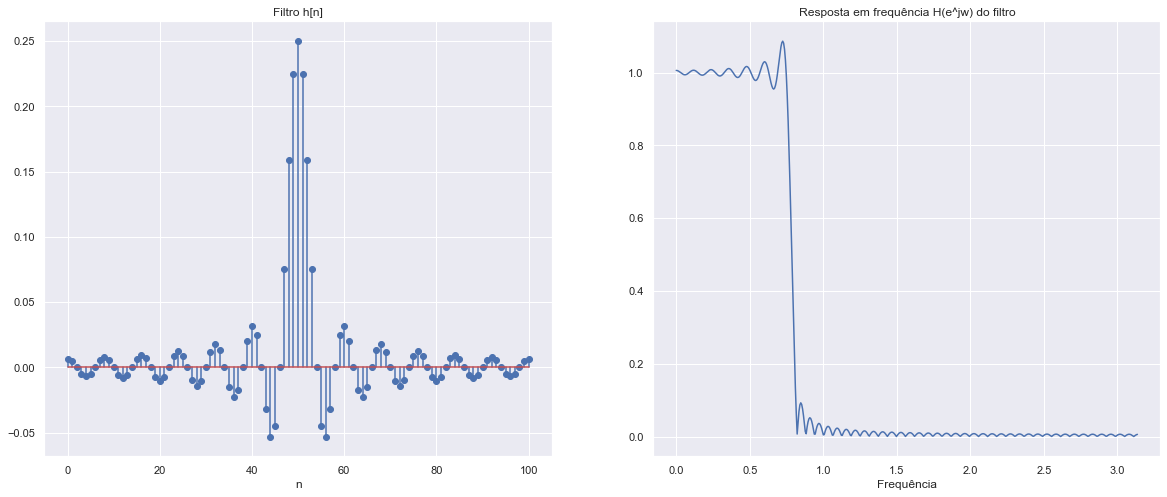

In [7]:
#plotando o filtro pedido e sua resposta em frequência
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.stem(n, h_pb)
ax2.plot(w, abs(H_pb))

ax1.set_title("Filtro h[n]")
ax1.set_xlabel("n")

ax2.set_title("Resposta em frequência H(e^jw) do filtro")
ax2.set_xlabel("Frequência")

plt.show()

## Item b
- N = 101
- frequência de corte = pi/4
- Passa-baixas.

# Parte 2

Testar os filtros projetados para a entrada `x[n] = cos(πn/20) + cos(πn/3).`

In [8]:
n = np.arange(0, 500, 1)

#definindo a função que representa o sinal x[n]
x_f = np.vectorize(lambda n: cos(pi*n/20) + cos(pi*n/3))

#gerando o sinal x[n]
x = x_f(n)

#calculando a resposta em frequência do sinal x[n]
w, X = signal.freqz(x)

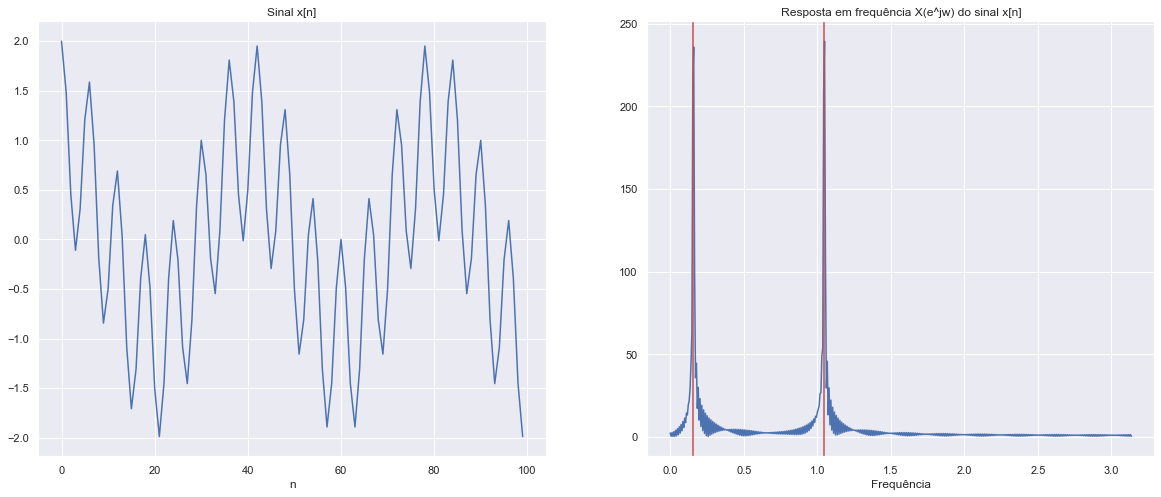

In [11]:
#plotando o sinal x[n] e sua resposta em frequência
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.plot(n[0:100], x[0:100])
ax2.plot(w, abs(X))

ax1.set_title("Sinal x[n]")
ax1.set_xlabel("n")

ax2.set_title("Resposta em frequência X(e^jw) do sinal x[n]")
ax2.set_xlabel("Frequência")
ax2.axvline(x=pi/20, color='r', label='pi/3')
ax2.axvline(x=pi/3, color='r', label='pi/3')

plt.show()

# Item a
Passar o sinal pelos dois filtros projetados acima.

- sinal  `y1[n]` foi passado pelo filtro projetado no item a (passa-baixa)
- sinal  `y2[n]` foi passado pelo filtro projetado no item b (passa-alta)

### Filtro passa baixa

In [12]:
#passando o sinal pelo filtro passa-baixa
y1 = signal.lfilter(b=h_pb, a=1, x=x)

#calculando a resposta em frequência do sinal y[n]
w, Y_1 = signal.freqz(y1)

### Filtro passa alta

In [13]:
# #passando o sinal pelo filtro passa-baixa
# y2 = signal.lfilter(b=h_pa, a=1, x=x)

# #calculando a resposta em frequência do sinal y[n]
# w, Y_1 = signal.freqz(y2)

## Item b

Escrever a resposta em frequência dos sinais filtrados e comparar com os sinais
- `x1[n] = cos(πn/20)`
- `x2[n] = cos(πn/3)`

In [14]:
# gerando sinal x1[n]
x1_f = np.vectorize(lambda n: cos(pi*n/20))
x1 = x1_f(n)

#calculando a resposta em frequência do sinal x1[n]
w, X_1 = signal.freqz(x1)

In [15]:
# gerando sinal x2[n]
x2_f = np.vectorize(lambda n: cos(pi*n/3))
x2 = x2_f(n)

#calculando a resposta em frequência do sinal x1[n]
w, X_2 = signal.freqz(x2)

### Comparação sinal x1[n] e y1[n]

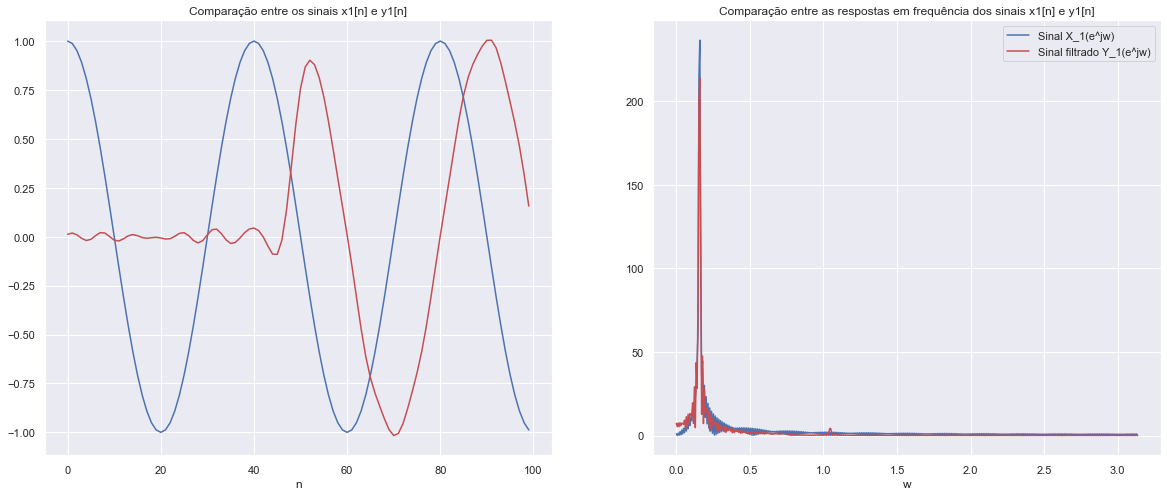

In [17]:
#plotando o sinal x[n] e sua resposta em frequência
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.plot(n[0:100], x1[0:100], label = "Sinal x1[n]")
ax1.plot(n[0:100], y1[0:100], label = "Sinal filtrado y1[n]", color = "r")

ax1.set_title("Comparação entre os sinais x1[n] e y1[n]")
ax1.set_xlabel("n")

ax2.plot(w, abs(X_1), label = "Sinal X_1(e^jw)")
ax2.plot(w, abs(Y_1), label = "Sinal filtrado Y_1(e^jw)", color = "r")
# ax2.axvline(x=pi/20, color='k', label="pi/3")

ax2.set_title("Comparação entre as respostas em frequência dos sinais x1[n] e y1[n]")
ax2.set_xlabel("w")

plt.legend()
plt.show()

### Comparação sinal x2[n] e y2[n]

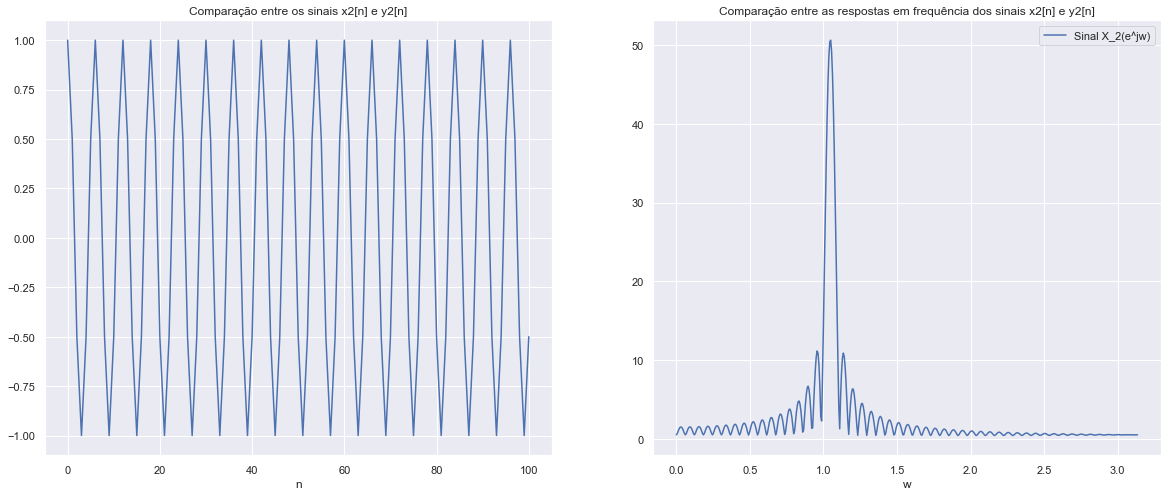

In [175]:
#plotando o sinal x[n] e sua resposta em frequência
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.plot(n, x2, label = "Sinal x2[n]")
# ax1.plot(n, y2, label = "Sinal filtrado y2[n]", color = "r")

ax1.set_title("Comparação entre os sinais x2[n] e y2[n]")
ax1.set_xlabel("n")

ax2.plot(w, abs(X_2), label = "Sinal X_2(e^jw)")
# ax2.plot(w, abs(Y_2), label = "Sinal filtrado Y_2(e^jw)", color = "r")
# ax2.axvline(x=pi/20, color='k', label="pi/3")

ax2.set_title("Comparação entre as respostas em frequência dos sinais x2[n] e y2[n]")
ax2.set_xlabel("w")

plt.legend()
plt.show()